In [2]:
pip install pandas matplotlib seaborn scikit-learn jupyter notebook


  Using cached pandas-2.3.2-cp311-cp311-win_amd64.whl.metadata (19 kB)
  Using cached matplotlib-3.10.5-cp311-cp311-win_amd64.whl.metadata (11 kB)
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached scikit_learn-1.7.1-cp311-cp311-win_amd64.whl.metadata (11 kB)
  Using cached jupyter-1.1.1-py2.py3-none-any.whl.metadata (2.0 kB)
  Using cached notebook-7.4.5-py3-none-any.whl.metadata (10 kB)
  Using cached numpy-2.3.2-cp311-cp311-win_amd64.whl.metadata (60 kB)
  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached contourpy-1.3.3-cp311-cp311-win_amd64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
     ---------------------------------------- 0.0/111.9 kB ? eta -:--:--
     --- ------------------------------------ 10.2/111.9 kB ? eta -:--:--
     --- ------------------------------------ 10.2/111.9 kB ? eta -:--:--
     --- -------


[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
pip install tensorflow torch



[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


  Using cached torch-2.8.0-cp311-cp311-win_amd64.whl.metadata (30 kB)
  Using cached absl_py-2.3.1-py3-none-any.whl.metadata (3.3 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached flatbuffers-25.2.10-py2.py3-none-any.whl.metadata (875 bytes)
  Using cached gast-0.6.0-py3-none-any.whl.metadata (1.3 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached libclang-18.1.1-py2.py3-none-win_amd64.whl.metadata (5.3 kB)
  Using cached opt_einsum-3.4.0-py3-none-any.whl.metadata (6.3 kB)
  Using cached protobuf-6.32.0-cp310-abi3-win_amd64.whl.metadata (593 bytes)
  Using cached termcolor-3.1.0-py3-none-any.whl.metadata (6.4 kB)
  Using cached wrapt-1.17.3-cp311-cp311-win_amd64.whl.metadata (6.5 kB)
  Using cached grpcio-1.74.0-cp311-cp311-win_amd64.whl.metadata (4.0 kB)
  Using cached h5py-3.14.0-cp311-cp311-win_amd64.whl.metadata (2.7 kB)
  Using cached filelock-3.19.1-py3-none-any.whl.metadata (2.1 kB)
  Using cached sy

In [4]:
pip freeze > requirements.txt


Note: you may need to restart the kernel to use updated packages.


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Paths
DATA_DIR = "../data/raw/"
train_file = os.path.join(DATA_DIR, "train_FD001.txt")
test_file = os.path.join(DATA_DIR, "test_FD001.txt")
rul_file = os.path.join(DATA_DIR, "RUL_FD001.txt")

# Column names
sensor_cols = [f'sensor_{i}' for i in range(1, 22)]
op_cols = ['op_setting_1', 'op_setting_2', 'op_setting_3']
cols = ['engine_id', 'cycle'] + op_cols + sensor_cols

# Load data
train_df = pd.read_csv(train_file, sep=' ', header=None)
train_df = train_df.dropna(axis=1, how='all')  # remove empty cols
train_df.columns = cols

print("Training shape:", train_df.shape)
train_df.head()


Training shape: (20631, 26)


,engine_id,cycle,op_setting_1,op_setting_2,op_setting_3,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,...,sensor_12,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044


Number of engines: 100


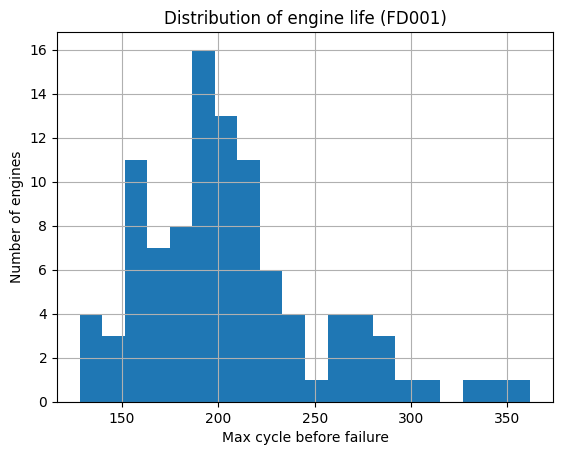

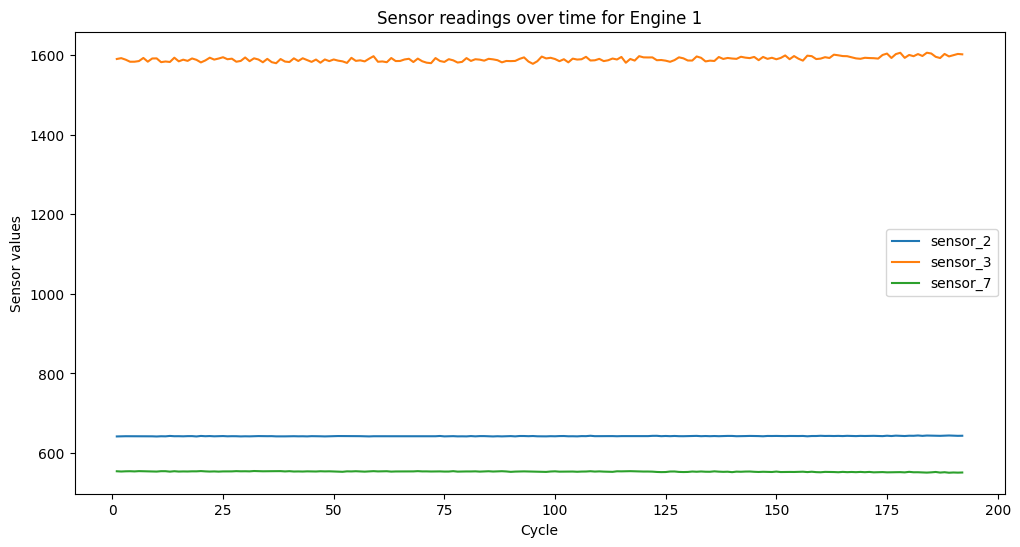

In [7]:
# Check number of engines
print("Number of engines:", train_df['engine_id'].nunique())

# Check distribution of cycles
train_df.groupby('engine_id')['cycle'].max().hist(bins=20)
plt.xlabel("Max cycle before failure")
plt.ylabel("Number of engines")
plt.title("Distribution of engine life (FD001)")
plt.show()

# Plot some sensor data for one engine
engine1 = train_df[train_df['engine_id'] == 1]
plt.figure(figsize=(12,6))
for sensor in ['sensor_2','sensor_3','sensor_7']:
    plt.plot(engine1['cycle'], engine1[sensor], label=sensor)
plt.legend()
plt.title("Sensor readings over time for Engine 1")
plt.xlabel("Cycle")
plt.ylabel("Sensor values")
plt.show()
